<a href="https://colab.research.google.com/github/kahmed92/AI-Q2-learning-resources/blob/master/Concrete_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("compresive_strength_concrete.csv")
df.head()
#checking null values
df[df.isna().any(axis=1)]
#or
df.isnull().sum()
data=df.copy()
data = data.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"cement",
                        "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"slag",
                        "Fly Ash (component 3)(kg in a m^3 mixture)":"fly_ash",
                        "Water  (component 4)(kg in a m^3 mixture)":"water",
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":"superplasticizer",
                        "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"coarse_agg",
                        "Fine Aggregate (component 7)(kg in a m^3 mixture)":"fine_agg",
                        "Age (day)":"age",
                        "Concrete compressive strength(MPa, megapascals) ":"strength"})

x = (data.loc[:, data.columns != 'strength'])
y = (data.loc[:, data.columns == 'strength'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
y=y/y.max()
x_train.head()
x_train/=x_train.mean()
y_train/=y_train.mean()
history=model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=300) 


Epoch 1/100
2/2 [==============================] - 1s 200ms/step - loss: 3.5904 - mae: 1.7260 - val_loss: 3.3000 - val_mae: 1.6757
Epoch 2/100
2/2 [==============================] - 0s 43ms/step - loss: 3.2205 - mae: 1.6363 - val_loss: 3.0608 - val_mae: 1.6116
Epoch 3/100
2/2 [==============================] - 0s 42ms/step - loss: 2.9406 - mae: 1.5522 - val_loss: 2.8800 - val_mae: 1.5602
Epoch 4/100
2/2 [==============================] - 0s 41ms/step - loss: 2.7419 - mae: 1.5003 - val_loss: 2.7310 - val_mae: 1.5155
Epoch 5/100
2/2 [==============================] - 0s 49ms/step - loss: 2.6699 - mae: 1.4764 - val_loss: 2.6035 - val_mae: 1.4754
Epoch 6/100
2/2 [==============================] - 0s 43ms/step - loss: 2.5459 - mae: 1.4359 - val_loss: 2.4868 - val_mae: 1.4373
Epoch 7/100
2/2 [==============================] - 0s 42ms/step - loss: 2.4121 - mae: 1.3920 - val_loss: 2.3794 - val_mae: 1.4018
Epoch 8/100
2/2 [==============================] - 0s 41ms/step - loss: 2.3111 - mae: 1.3

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


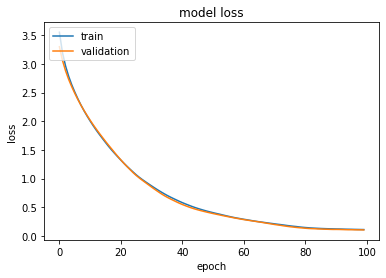

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
x_test/=x_test.mean()
y_test/=y_test.mean()
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print("test_mae_score:",test_mae_score)
print("test_mse_score:",test_mse_score)

10/10 [==============================] - 0s 1ms/step - loss: 0.1149 - mae: 0.2696
test_mae_score: 0.269569456577301
test_mse_score: 0.11487738788127899
